
# **Laptop Price Prediction**




## **Overview :**

This dataset is all about the latest laptop listings from Amazon.com. Originally, I got it for some exploratory data analysis (EDA) work. But now, my goal is to use it to predict laptop prices, and I'm leaning on the Decision Tree Regressor for that.

As I dug into the data, I noticed a few things. There are some missing values, and I also picked up on possible biases in different parts of the dataset. To keep things accurate, I've done some data cleaning to filter out the incomplete or biased stuff. Yes, this cleaning has led to fewer data points, but it's a trade-off I'm willing to make to ensure our predictions are on point.

Now, I'm also thinking about using pruning techniques to make sure our model doesn't get too complicated. My main aim here is to make the data cleaner and improve the accuracy of price predictions.

I'm pretty excited about this project, and I'm dedicated to making the data better for more reliable predictions.

In [449]:
import pandas as pd, numpy as np,seaborn as sns, matplotlib.pyplot as plt,warnings
warnings.filterwarnings("ignore")



**About the Dataset**

**Description:**
This dataset comprises a comprehensive collection of the latest laptops available on Amazon.com. It contains product details, such as rating, price, operating system, title, review count, and display size.There are 14 distinct features provided for each laptop listing.

**Data Dictionary:**
- **Brand:** The manufacturer of the laptop.
- **Model:** The model name or number of the laptop.
- **Screen Size:** The size of the laptop's display in inches.
- **Color:** The color of the laptop.
- **Hard Disk:** The size of the hard disk installed, measured in gigabytes (GB) or terabytes (TB).
- **CPU:** The type of processor installed in the laptop.
- **RAM:** The amount of RAM installed in the laptop.
- **Operating System (OS):** The operating system used by the laptop.
- **Special Features:** Additional features or specifications.
- **Graphics Card:** The type of graphics card installed in the laptop.
- **Graphics Coprocessor:** The name of the graphics card's coprocessor.
- **CPU Rating:** The rating or performance score of the CPU.
- **Rating:** The average customer rating, rated out of 5 stars, as of October 2023.
- **Price:** The price of the laptop in USD, as of October 2023.

In [450]:
lap = pd.read_csv(r'/content/drive/MyDrive/Laptop price prediction/laptop_prices.csv')

In [451]:
lap.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,rokc,NaN,14.00,Blue,1000.0,Intel Core i7,8.0,Windows 11,NaN,Integrated,Intel,1.2,NaN,589.99
1,hp,NaN,15.60,Silver,1000.0,Intel Core i5,64.0,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,999.99
2,msi,Vector GP66 12UGS-267,15.66,Core Black,NaN,Intel Core i9,32.0,Windows 11 Home,NaN,Dedicated,NaN,1.8,5.0,1599.00
3,apple,MacBook Air,13.30,Silver,256.0,Unknown,8.0,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,689.99
4,apple,MacBook Air,15.30,Midnight,256.0,Unknown,8.0,Mac OS,NaN,Integrated,NaN,NaN,4.8,1144.48


In [452]:
lap.shape

(4446, 14)

In [453]:
lap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   float64
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   float64
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   float64
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   float64
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   float64
dtypes: float64(6), object(8)
memory usage: 486.4+ KB


#Exploratory Data Analysis


In [454]:
lap.isnull().sum()
# There are many null value in this data so we will remove that later

brand                      0
model                   1164
screen_size               29
color                    579
harddisk                 576
cpu                      100
ram                       61
OS                        26
special_features        2392
graphics                  65
graphics_coprocessor    1872
cpu_speed               2926
rating                  2272
price                      5
dtype: int64

In [455]:
lap.describe()


,screen_size,harddisk,ram,cpu_speed,rating,price
count,4417.000000,3870.000000,4385.000000,1520.000000,2174.000000,4441.000000
mean,15.074589,897.100517,23.965562,1.658428,4.086891,1189.330016
std,1.190357,842.674543,17.328353,0.845020,1.165337,826.022711
min,10.000000,8.000000,1.000000,0.900000,1.000000,57.990000
25%,14.000000,512.000000,16.000000,1.100000,4.000000,589.990000
50%,15.600000,1000.000000,16.000000,1.200000,4.500000,999.990000
75%,15.600000,1000.000000,32.000000,1.800000,5.000000,1612.990000
max,27.000000,8000.000000,128.000000,9.100000,5.000000,11261.240000


In [456]:
lap.brand.value_counts()

dell                             1730
hp                                810
rokc                              637
msi                               473
lenovo                            318
asus                              163
acer                              119
lg                                 39
apple                              29
samsung                            23
microsoft                          15
alienware                          14
panasonic                          12
gigabyte                           11
toughbook                          11
razer                               6
luqeeg                              3
latitude                            3
shoxlab                             2
ctl                                 2
computer upgrade king               2
iview                               2
quality refurbished computers       2
gateway                             2
xpg                                 1
mytrix                              1
jtd         


**Filtering Data for Enhanced Predictive Accuracy**

In our dataset, we've identified limited data for certain brands and specific columns. To boost prediction accuracy, we're taking these steps:

**Column Filtering:**

We will retain brands with more than 400 data points, ensuring sufficient data for precise predictions. Brands with fewer data points will be excluded.

This approach extends to other columns, where we will keep data with a substantial amount and exclude those with limited data.

These filters elevate data quality, yielding a more dependable and accurate machine learning model for price prediction.


In [457]:
lap = lap[lap['brand'].map(lap['brand'].value_counts()) >= 200]


In [458]:
lap = lap[lap['model'].map(lap['model'].value_counts()) >= 65]


In [459]:
lap = lap[lap['OS'].map(lap['OS'].value_counts()) >= 100]


In [460]:
lap = lap[lap['cpu'].map(lap['cpu'].value_counts()) >= 50]


In [461]:
lap.screen_size.value_counts()

15.60    575
15.66    196
16.00    139
14.00      2
17.00      1
Name: screen_size, dtype: int64

**Focused Prediction on 15.60 -Inch Screen Sizes**

We will predict prices for only 15.60 screen sizes, dropping the rest for a more streamlined and accurate model.

In [462]:
lap = lap.query('screen_size == 15.60')

In [463]:
lap.screen_size.value_counts()

15.6    575
Name: screen_size, dtype: int64

In [464]:
lap.shape

(575, 14)

In [465]:
lap.isnull().sum()
# here we can see special_features,ratings and cpu_speed has very high numbers of missing data so I will try droping them.
# And fill other columns null value with their mean or mode.

brand                     0
model                     0
screen_size               0
color                     8
harddisk                193
cpu                       0
ram                       8
OS                        0
special_features        347
graphics                  8
graphics_coprocessor    236
cpu_speed               382
rating                  382
price                     0
dtype: int64

i will remove columns which have large amount of missing value

In [466]:
lap.drop(['cpu_speed','special_features','rating',"screen_size"],axis =1,inplace =True)


I've handled missing data in the 'lap' DataFrame like this:

- For text or boolean columns, I filled missing values with the most common entry to keep things consistent.
- In numeric columns, I used the rounded average to replace missing values. This maintains the data's statistical properties. It's all about preparing the data for analysis and modeling.

In [467]:
for x in lap.columns:
    if lap[x].dtype=="object" or lap[x].dtype=="bool":
        lap[x].fillna(lap[x].mode()[0], inplace=True)
    elif lap[x].dtype=="int64" or lap[x].dtype=="float64":
        lap[x].fillna(round(lap[x].mean()), inplace=True)
lap.isnull().sum()

brand                   0
model                   0
color                   0
harddisk                0
cpu                     0
ram                     0
OS                      0
graphics                0
graphics_coprocessor    0
price                   0
dtype: int64

In [468]:
lap.drop(lap[lap['graphics'] == 'Nvidia GeForce MX250'].index, inplace=True)

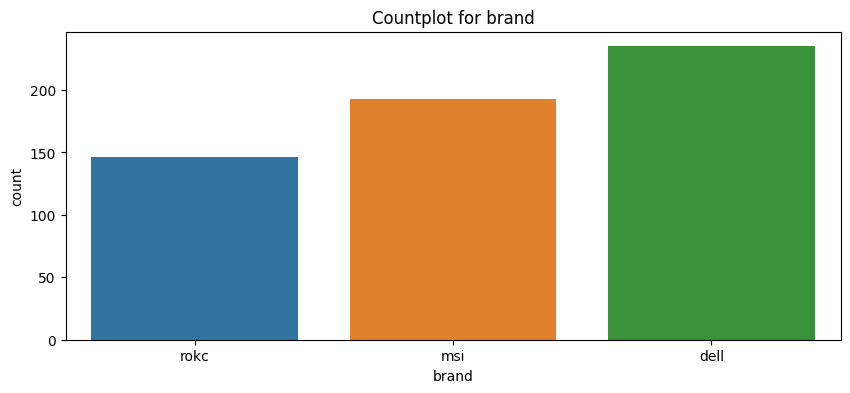

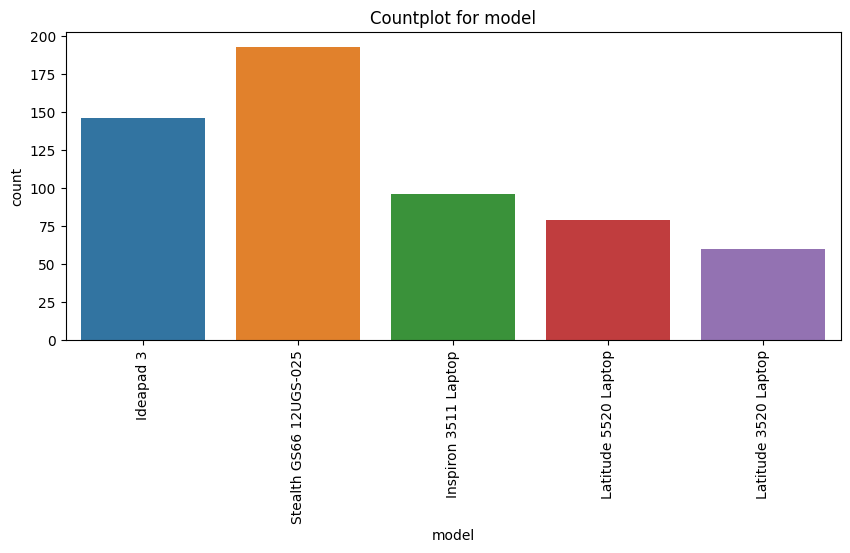

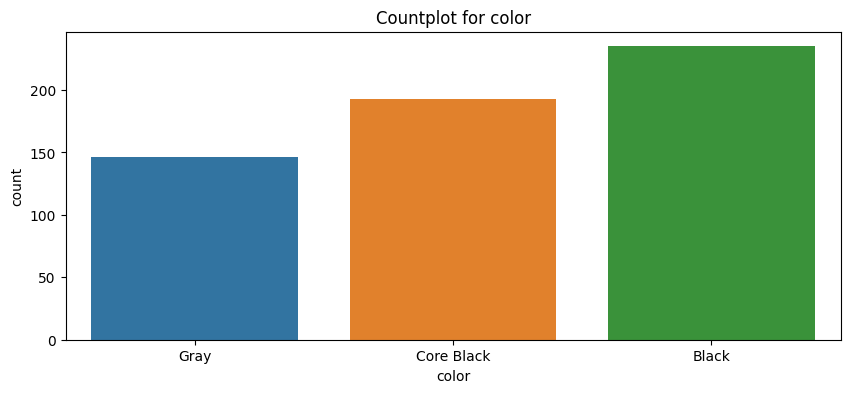

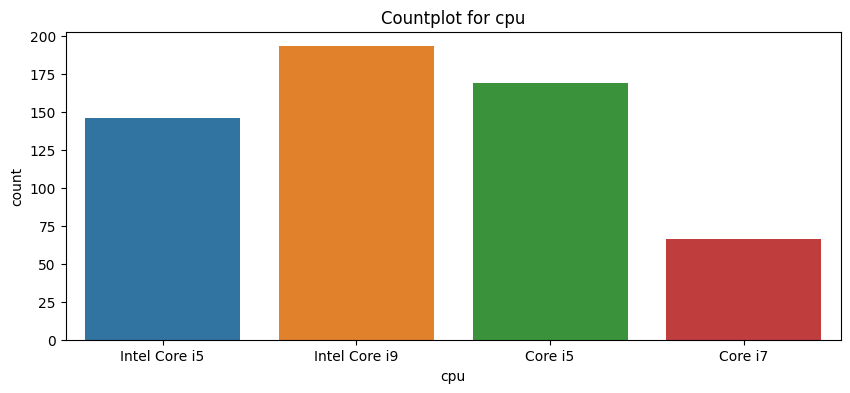

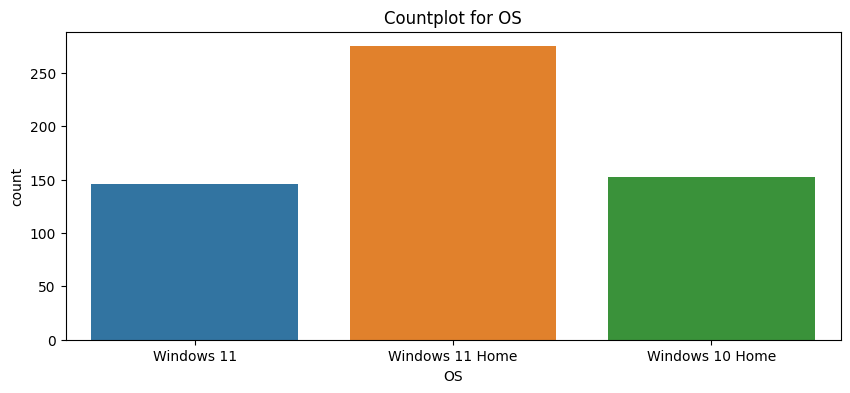

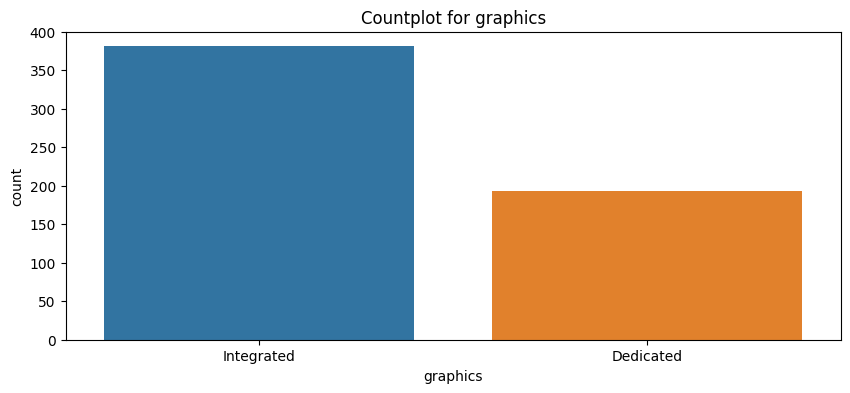

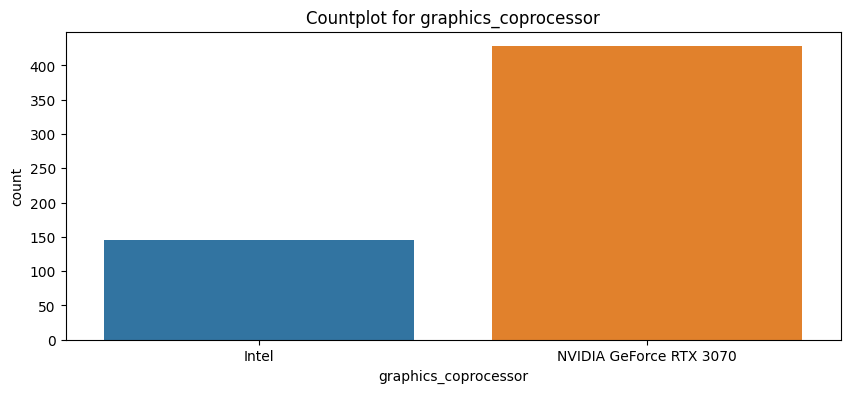

In [469]:
category = lap.select_dtypes(include="object").columns

for column in category:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=lap, x=column)
    plt.title(f"Countplot for {column}")
    if len(lap[column].unique()) > 4:
      rotation = 90
    else:
      rotation = 0
    plt.xticks(rotation= rotation)
    plt.show()


**Generating a List of Categorical Column Names**

To facilitate label encoding, I've compiled a list of column names in the dataset where the data type is 'object.' These columns typically contain categorical information. This list will be instrumental for applying label encoding to categorical variables, making them suitable for machine learning models.

In [470]:
colname=[]
for x in lap.columns:
    if lap[x].dtype == "object":
        colname.append(x)
colname


['brand', 'model', 'color', 'cpu', 'OS', 'graphics', 'graphics_coprocessor']

In [471]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in colname:
  lap[x]=le.fit_transform(lap[x])


In [472]:
lap.columns

Index(['brand', 'model', 'color', 'harddisk', 'cpu', 'ram', 'OS', 'graphics',
       'graphics_coprocessor', 'price'],
      dtype='object')

In [473]:
lap.shape

(574, 10)

In [474]:
x = lap.iloc[:,0:-1]
y= lap.iloc[:,-1]

#Decision Tree Regressor algorithm

In [475]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 10)

In [476]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor()
dc.fit(x_train,y_train)
y_pred = dc.predict(x_test)

In [477]:
dc.score(x_train,y_train)

0.9835608973450757

In [478]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
adjusted_r_squared = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)

print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Adjusted R-squared (Adjusted R2):", adjusted_r_squared)


R-squared (R2) Score: 0.8659029001497597
Root Mean Squared Error (RMSE): 228.75071375533054
Adjusted R-squared (Adjusted R2): 0.8637630528117239



**Result :**

Our current decision tree model appears to be overfit, as indicated by a high training score (0.98) and a lower testing score (0.86). To mitigate overfitting and improve the model's generalization, we will implement the Cost Complexity Pruning (CCP) method. CCP pruning will help us find the right level of complexity for our decision tree, ensuring it performs well on unseen data while avoiding excessive complexity.


**Cost Complexity Pruning (CCP)**

In this code, we're using a Decision Tree Regressor to make accurate price predictions. To achieve this, we're employing a process known as Cost Complexity Pruning (CCP) to fine-tune our decision tree model.

First, we calculate the CCP path using the `cost_complexity_pruning_path` method. This path helps us determine the optimal level of complexity for our decision tree. The method returns two arrays: `ccp_alphas` and `impurities`. `ccp_alphas` contain different complexity parameters, and `impurities` represent the impurities at each alpha level.

We then create a list, `clfs`, to store different decision tree models with varying `ccp_alpha` values. We loop through the `ccp_alphas` and for each alpha, we create a decision tree with that specific alpha, fit it with our training data, and add it to the `clfs` list. This process generates pruned trees with different complexities.

By examining the number of nodes in the last pruned tree and its corresponding `ccp_alpha`, we gain insights into the selected complexity level. The number of nodes reflects the tree's structure and complexity, and the `ccp_alpha` is the parameter controlling this complexity.


In [479]:
path = dc.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities = path.ccp_alphas,path.impurities

In [480]:
clfs = []
for ccp_alpha in ccp_alphas:
  dc = DecisionTreeRegressor(random_state=0,ccp_alpha=ccp_alpha)
  dc.fit(x_train,y_train)
  clfs.append(dc)
print("no. of tree: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

no. of tree: 3 with ccp_alpha: 240052.45444169972


**Ploting train and test R-squared scores**

To assess the performance of each pruned tree, we calculate R-squared scores for both the training and test datasets. These scores help us understand how well the model predicts prices at different complexity levels. The results are then visualized using a plot to illustrate the relationship between R-squared scores and `ccp_alpha`.

After analyzing the plot and considering the trade-off between model complexity and predictive accuracy, we select a specific `ccp_alpha` value. We create the final pruned decision tree, referred to as `clf`, using this chosen `ccp_alpha`. This optimized model is used for making price predictions.


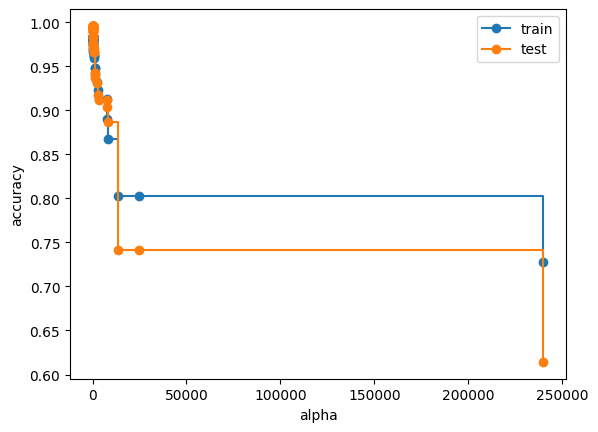

In [481]:
train_scores = [dc.score(x_train,y_train) for dc in clfs]
test_scores = [dc.score(x_test,y_pred) for dc in clfs]

fig,ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post" )
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post" )
ax.legend()
plt.show()

In [482]:
clf = DecisionTreeRegressor(ccp_alpha= 950)
clf.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=950)

In [483]:
pred=clf.predict(x_test)

In [484]:
clf.score(x_train,y_train)

0.9514616798650393

In [485]:
from sklearn.metrics import r2_score, mean_squared_error

cr2 = r2_score(y_test, pred)
crmse = np.sqrt(mean_squared_error(y_test, pred))
cadjusted_r_squared = 1 - (1 - cr2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)

print("R-squared (R2) Score:", cr2)
print("Root Mean Squared Error (RMSE):", crmse)
print("Adjusted R-squared (Adjusted R2):", cadjusted_r_squared)

R-squared (R2) Score: 0.9171132996960184
Root Mean Squared Error (RMSE): 179.84368412934944
Adjusted R-squared (Adjusted R2): 0.9157906395847847


**Tree Diagram**

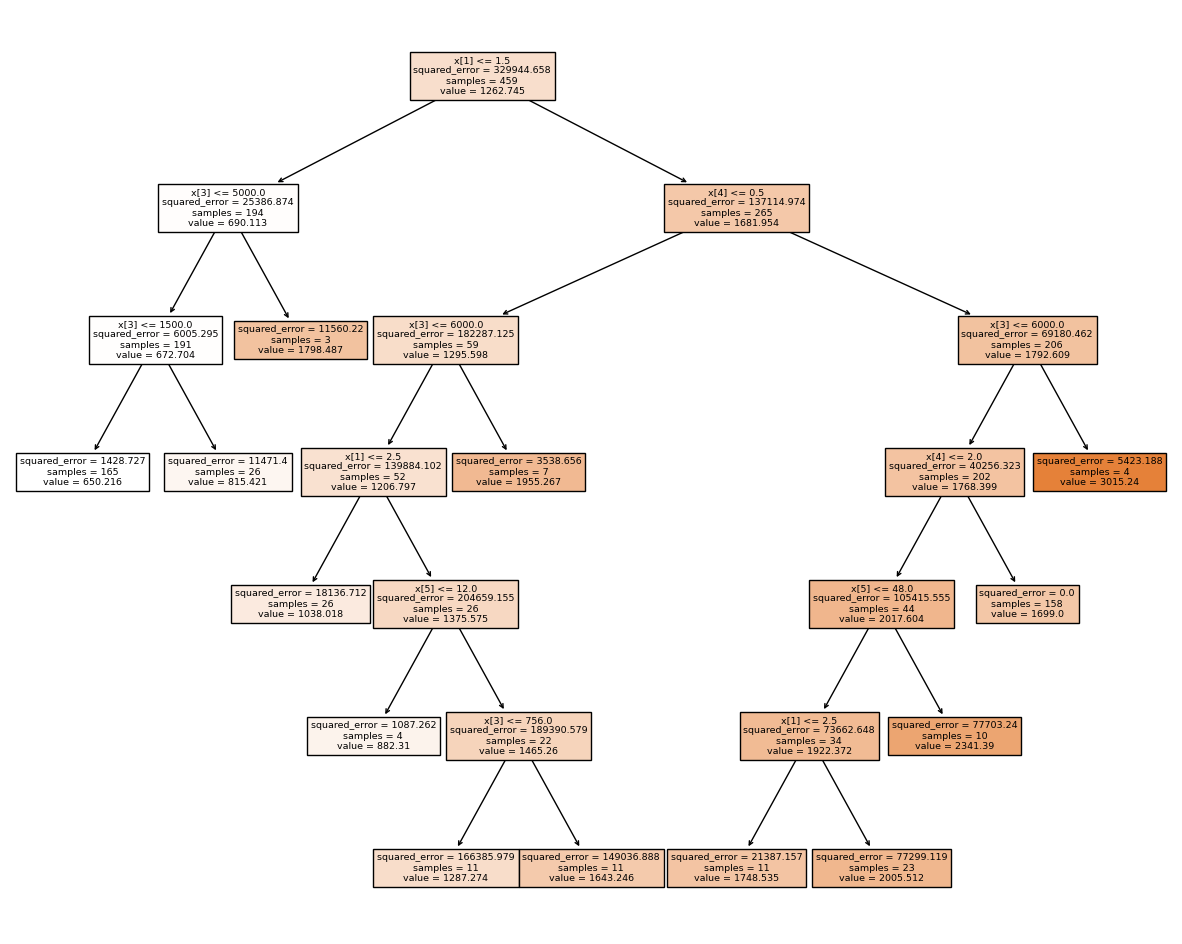

In [486]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
plot_tree(clf, filled=True)
plt.show()

In [487]:
new = pd.DataFrame(x_test.copy())
new
new['Actual price'] = y_test
new['Predicted price'] = y_pred
new['Predicted using ccp price'] = pred.round(2)
new = new.reset_index().drop("index",axis=1)
new

,brand,model,color,harddisk,cpu,ram,OS,graphics,graphics_coprocessor,Actual price,Predicted price,Predicted using ccp price
0,0,2,0,128.0,1,8.0,2,1,1,1529.99,1574.990,1748.54
1,0,2,0,1000.0,0,16.0,2,1,1,948.19,953.820,1038.02
2,2,0,2,1000.0,2,20.0,1,1,0,639.99,639.990,650.22
3,0,3,0,8000.0,1,32.0,0,1,1,3004.99,2956.990,3015.24
4,0,3,0,1000.0,1,16.0,2,1,1,2439.99,1718.490,2005.51
...,...,...,...,...,...,...,...,...,...,...,...,...
110,1,4,1,1528.0,3,32.0,2,0,1,1699.00,1699.000,1699.00
111,2,0,2,1000.0,2,20.0,1,1,0,639.99,639.990,650.22
112,0,1,0,2000.0,0,16.0,0,1,1,714.99,752.204,815.42
113,2,0,2,1000.0,2,20.0,1,1,0,639.99,639.990,650.22
